

**Dataset Summary**

The dataset contains **11,914 rows** and **16 columns**. It includes details about various car models, their specifications, and market attributes. Below are the features:

1. **Make**: Manufacturer of the car (e.g., BMW, Ford).
2. **Model**: Specific model of the car.
3. **Year**: Manufacturing year.
4. **Engine Fuel Type**: Type of fuel the engine uses.
5. **Engine HP**: Horsepower of the engine.
6. **Engine Cylinders**: Number of cylinders in the engine.
7. **Transmission Type**: Type of transmission (e.g., Manual, Automatic).
8. **Driven Wheels**: Type of drive system (e.g., rear-wheel drive, all-wheel drive).
9. **Number of Doors**: Number of doors on the car.
10. **Market Category**: Marketing classification (e.g., Luxury, High-Performance).
11. **Vehicle Size**: Size category of the car (e.g., Compact, Midsize).
12. **Vehicle Style**: Style of the vehicle (e.g., Coupe, Convertible).
13. **highway MPG**: Fuel efficiency on highways.
14. **city mpg**: Fuel efficiency in the city.
15. **Popularity**: Popularity of the car (numerical value).
16. **MSRP**: Manufacturer's Suggested Retail Price (target variable for prediction).


In [ ]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import defaultdict



# Machine Learning

from sklearn.neighbors import KNeighborsRegressor


In [ ]:
  # shared link
shared_link = 'https://drive.google.com/file/d/11y9CA84eJAoCoNcWDLpXOC9ZYVkv6af1/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Car Features and MSRP.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Car Features and MSRP.csv')
data.head(20)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

(None,
                Year    Engine HP  Engine Cylinders  Number of Doors  \
 count  11914.000000  11845.00000      11884.000000     11908.000000   
 mean    2010.384338    249.38607          5.628829         3.436093   
 std        7.579740    109.19187          1.780559         0.881315   
 min     1990.000000     55.00000          0.000000         2.000000   
 25%     2007.000000    170.00000          4.000000         2.000000   
 50%     2015.000000    227.00000          6.000000         4.000000   
 75%     2016.000000    300.00000          6.000000         4.000000   
 max     2017.000000   1001.00000         16.000000         4.000000   
 
         highway MPG      city mpg    Popularity          MSRP  
 count  11914.000000  11914.000000  11914.000000  1.191400e+04  
 mean      26.637485     19.733255   1554.911197  4.059474e+04  
 std        8.863001      8.987798   1441.855347  6.010910e+04  
 min       12.000000      7.000000      2.000000  2.000000e+03  
 25%       22.0000

Unique values for columns.

In [ ]:

for col in data.columns:
    unique_count = len(data[col].unique())
    print(f"column {data[col].value_counts()}")
    print(f"  Number of Unique Values: {unique_count}")
    print("-" * 100)

# Total number of unique values across all columns
total_unique_count = sum(len(data[col].unique()) for col in data.columns)
print(f"Total number of unique values across all columns: {total_unique_count}")

column Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             

In [ ]:
missing_values =data.isnull().sum()
missing_values

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


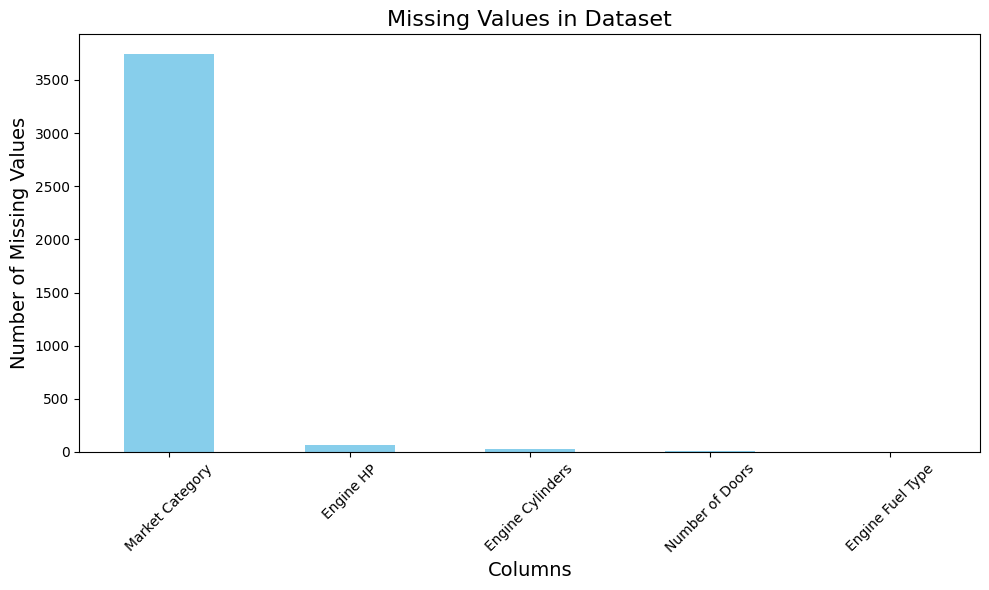

In [ ]:
# Visualize missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Missing Values in Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Print the percentage of missing values
print(missing_percentage)


Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64


In [ ]:

# Drop rows with missing values in 'Engine HP' and 'Engine Cylinders'
data.dropna(subset=['Engine HP', 'Engine Cylinders'], inplace=True)

# Fill missing values in 'Number of Doors' with the mode
data['Number of Doors'].fillna(data['Number of Doors'].mode()[0], inplace=True)
# Fill missing values in 'Market Category'and 'Engine Fuel Type' with 'Unknown'
data['Market Category'].fillna('Unknown', inplace=True)
data['Engine Fuel Type'].fillna('Unknown', inplace=True)

# Verify if there are any more missing values
print(data.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


# Visualizations to explore the data

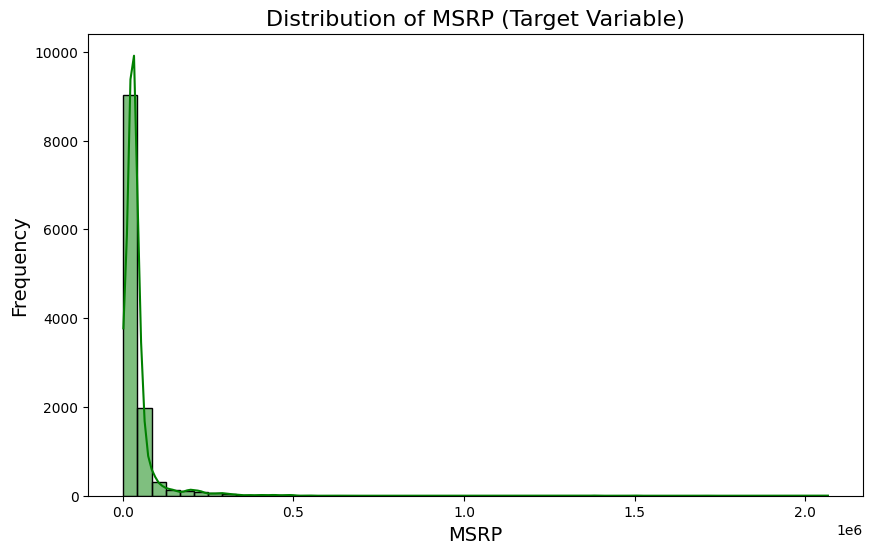

In [ ]:
# Distribution of the target variable (MSRP)
plt.figure(figsize=(10, 6))
sns.histplot(data['MSRP'], bins=50, kde=True, color='green')
plt.title('Distribution of MSRP (Target Variable)', fontsize=16)
plt.xlabel('MSRP', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


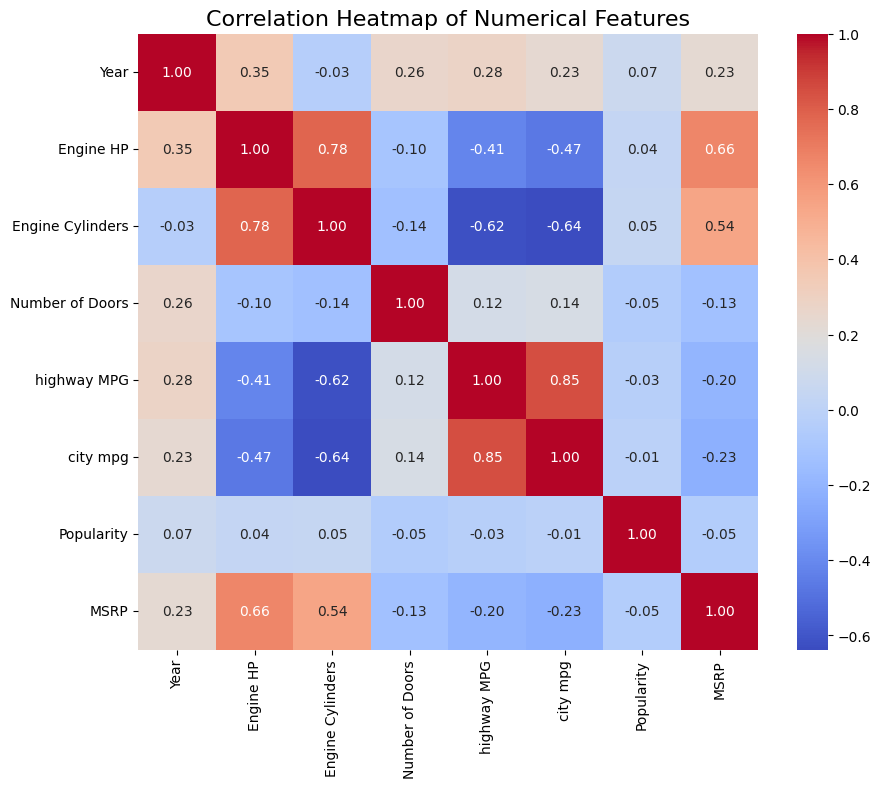

In [ ]:

# Correlation heatmap for numerical features
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
                      'highway MPG', 'city mpg', 'Popularity', 'MSRP']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()



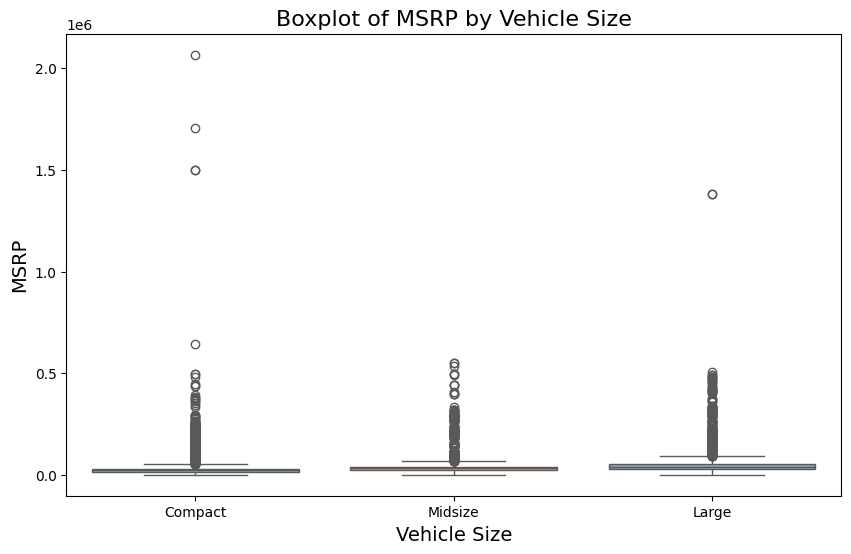

In [ ]:

# Boxplot of MSRP by Vehicle Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Size', y='MSRP', data=data, palette='Set2')
plt.title('Boxplot of MSRP by Vehicle Size', fontsize=16)
plt.xlabel('Vehicle Size', fontsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.show()


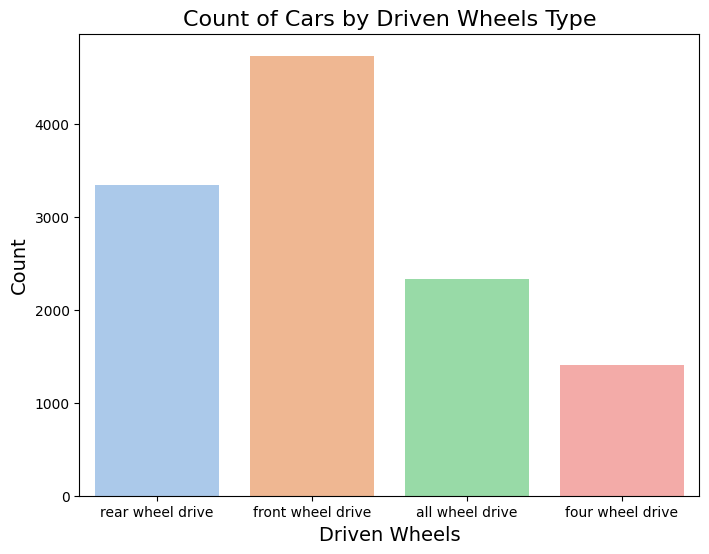

In [ ]:

# Countplot for Driven Wheels
plt.figure(figsize=(8, 6))
sns.countplot(x='Driven_Wheels', data=data, palette='pastel')
plt.title('Count of Cars by Driven Wheels Type', fontsize=16)
plt.xlabel('Driven Wheels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:


# Identify categorical features
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
                        'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

# Initialize a dictionary to hold encoded features
encoded_features = pd.DataFrame(index=data.index)

# Apply One-Hot Encoding for low-cardinality categorical features
low_cardinality_features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
ohe = OneHotEncoder(sparse_output=False, drop='first') # Changed sparse to sparse_output
encoded_ohe = pd.DataFrame(ohe.fit_transform(data[low_cardinality_features]),
                           columns=ohe.get_feature_names_out(low_cardinality_features), index=data.index)
encoded_features = pd.concat([encoded_features, encoded_ohe], axis=1)

# Apply Frequency Encoding for high-cardinality features
high_cardinality_features = ['Make', 'Model', 'Market Category']
frequency_encoding = defaultdict(dict)
for feature in high_cardinality_features:
    freq_map = data[feature].value_counts(normalize=True)
    frequency_encoding[feature] = freq_map
    encoded_features[feature] = data[feature].map(freq_map)

# Add numerical features to the encoded dataframe
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
                      'highway MPG', 'city mpg', 'Popularity', 'MSRP']
encoded_features = pd.concat([encoded_features, data[numerical_features]], axis=1)


# Verify the encoded dataset
encoded_features.head()

,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATIC,...,Model,Market Category,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000085,0.018196,2011,335.0,6.0,2.0,26,19,3916,46135
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001354,0.056957,2011,300.0,6.0,2.0,28,19,3916,40650
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001354,0.028267,2011,300.0,6.0,2.0,28,20,3916,36350
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001354,0.056957,2011,230.0,6.0,2.0,28,18,3916,29450
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001354,0.072021,2011,230.0,6.0,2.0,28,18,3916,34500


In [ ]:
encoded_features.info(),encoded_features.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 11913
Data columns (total 44 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Engine Fuel Type_diesel                                        11816 non-null  float64
 1   Engine Fuel Type_electric                                      11816 non-null  float64
 2   Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)  11816 non-null  float64
 3   Engine Fuel Type_flex-fuel (premium unleaded required/E85)     11816 non-null  float64
 4   Engine Fuel Type_flex-fuel (unleaded/E85)                      11816 non-null  float64
 5   Engine Fuel Type_natural gas                                   11816 non-null  float64
 6   Engine Fuel Type_premium unleaded (recommended)                11816 non-null  float64
 7   Engine Fuel Type_premium unleaded (required)                   

(None,
        Engine Fuel Type_diesel  Engine Fuel Type_electric  \
 count             11816.000000               11816.000000   
 mean                  0.012949                   0.001100   
 std                   0.113057                   0.033152   
 min                   0.000000                   0.000000   
 25%                   0.000000                   0.000000   
 50%                   0.000000                   0.000000   
 75%                   0.000000                   0.000000   
 max                   1.000000                   1.000000   
 
        Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)  \
 count                                       11816.000000               
 mean                                            0.002200               
 std                                             0.046859               
 min                                             0.000000               
 25%                                             0.000000           

In [ ]:
# prompt: scale the features

# Separate features (X) and target variable (y)
X = encoded_features.drop('MSRP', axis=1)
y = encoded_features['MSRP']

# Scale numerical features using StandardScaler
numerical_cols = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Now X contains scaled numerical features
X.head()


,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATIC,...,Make,Model,Market Category,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.028267,0.000085,0.018196,0.084255,0.782428,0.199713,-1.622936,-0.042960,-0.050077,1.640722
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.028267,0.001354,0.056957,0.084255,0.462082,0.199713,-1.622936,0.225762,-0.050077,1.640722
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.028267,0.001354,0.028267,0.084255,0.462082,0.199713,-1.622936,0.225762,0.103135,1.640722
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.028267,0.001354,0.056957,0.084255,-0.178611,0.199713,-1.622936,0.225762,-0.203288,1.640722
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.028267,0.001354,0.072021,0.084255,-0.178611,0.199713,-1.622936,0.225762,-0.203288,1.640722


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9452, 43), (2364, 43), (9452,), (2364,))

In [ ]:


# Define the KNN Regressor
knn_model = KNeighborsRegressor()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and train the final model
best_params = grid_search.best_params_
final_model = grid_search.best_estimator_

# Evaluate the model
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test MSE:", mse)
print("Test R2 Score:", r2)
print("Test MAE:", mae)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test MSE: 587482154.5570687
Test R2 Score: 0.813355774701169
Test MAE: 4025.4447967169


In [ ]:
# Save the model
joblib.dump(final_model, 'final_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


# Save the frequency encoding
joblib.dump(frequency_encoding, 'frequency_encoding.pkl')

['frequency_encoding.pkl']

In [ ]:


# Load the saved model and scaler
loaded_model = joblib.load('final_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
frequency_encoding = joblib.load('frequency_encoding.pkl') #<-- You will need to save the dictionary during training

# Sample new data (replace with your actual data)
new_data = pd.DataFrame({
    'Make': ['BMW'],
    'Model': ['X5'],
    'Year': [2023],
    'Engine Fuel Type': ['premium unleaded (required)'],
    'Engine HP': [335],
    'Engine Cylinders': [6.0],
    'Transmission Type': ['AUTOMATIC'],
    'Driven_Wheels': ['all wheel drive'],
    'Number of Doors': [4.0],
    'Market Category': ['Luxury'],
    'Vehicle Size': ['Midsize'],
    'Vehicle Style': ['SUV'],
    'highway MPG': [24],
    'city mpg': [18],
    'Popularity': [3916]
})


# Identify categorical features (same as in training)
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
                        'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

# Initialize a dictionary to hold encoded features
encoded_features = pd.DataFrame(index=new_data.index)

# One-Hot Encoding for low-cardinality features
low_cardinality_features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #handle_unknown='ignore' is crucial
encoded_ohe = ohe.fit_transform(new_data[low_cardinality_features])

encoded_ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(low_cardinality_features), index=new_data.index)

encoded_features = pd.concat([encoded_features, encoded_ohe_df], axis=1)

# Frequency Encoding for high-cardinality features
high_cardinality_features = ['Make', 'Model', 'Market Category']

# Load the frequency encodings from the training data (you'll need to save these)

for feature in high_cardinality_features:
    encoded_features[feature] = new_data[feature].map(frequency_encoding[feature]).fillna(0) #Added fillna(0) to avoid NaNs

# Add numerical features
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
encoded_features = pd.concat([encoded_features, new_data[numerical_features]], axis=1)

# Align columns with the training data. Important for new data!
X_new = encoded_features.reindex(columns=loaded_model.feature_names_in_, fill_value=0)


# Scale numerical features
numerical_cols = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
X_new[numerical_cols] = loaded_scaler.transform(X_new[numerical_cols])

# Make predictions
new_predictions = loaded_model.predict(X_new)

print("New Predictions:", new_predictions)

New Predictions: [59548.92078657]
